___
# PROJETO 3: PREDIÇÃO
___
    
### Integrantes:
    1. Bernardo Sarcinelli  
    2. Daniel Freitas
    3. Maria Eduarda Rocha

<div id="leitura"></div>

## INTRODUÇÃO

In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

## Base de Dados Escolhida:
Para este projeto utilizaremos a Base de Dados referente ao 4° semestre de 2023.
O arquivo utilizado foi disponibilizado do notebook 'Leitura PNADC 2023' por meio do link
https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1,
sendo baixado como 'pnad23_4' no formato csv, logo, 'pnad23_4.csv'.

In [40]:
filename = 'pnad23_4.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'Esse deve ser salvo na mesma pasta em que se encontrar este arquivo jupyter notebook')

Parece que o arquivo pnad23_4.csv está na mesma pasta do notebook, yay!


In [41]:
# Leitura dos Dados correspondentes

dados = pd.read_csv('pnad23_4.csv')
print('DADOS - QUARTO SEMESTRE (2023)')
dados

DADOS - QUARTO SEMESTRE (2023)


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
1,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
2,2023,4,11,11.0,NaN,110000016,1110011,2,10,5,...,175.916359,512.399129,176.708843,0.0,0.000000,0.0,378.226179,197.177218,158.596782,357.260151
3,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
4,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473201,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473202,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473203,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000
473204,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000


In [42]:
# Especificação das Colunas que serão utilizadas
colunas = [
           'UF',    # Estado
           'V2007', # Sexo
           'V2010', # Cor ou raça
           'V2009', # Idade
           'V3001', # Alfabetizado
           'V3008', # Frequentou a escola
           'VD3004', # Nível de Escolaridade
           'V4012', # Tipo de ocupação
           'VD4014', # Faixa de horas trabalhadas
           'VD4017', # Rendimento Mensal Efetivo
           'V403411', # Faixa de Rendimento [em SM - Salário Mínimo]
           'V1022', # Situação do domicílio          
]   

In [43]:
# Filtrando apenas as colunas desejadas
dados_colunas = dados[colunas]

In [44]:
# Renomeando as colunas
dados_colunas = dados_colunas.rename(columns={
    'UF': 'Estado',
    'V2007': 'Sexo',
    'V2010': 'Cor_Raça',
    'V2009': 'Idade',
    'V3001': 'Alfabetizado',
    'V3008': 'Frequentou a Escola',
    'VD3004': 'Nível de Instruçao',
    'V4012': 'Tipo de Ocupacao',
    'VD4014': 'Faixa de horas trabalhadas',
    'VD4017': 'Rendimento Mensal Efetivo',
    'V403411': 'Faixa de Rendimento [em SM]',
    'V1022': 'Situacao do Domicílio'
})

In [45]:
# Reconfigurando as informações das colunas

# Estado
dados_colunas['Estado'] = dados_colunas['Estado'].astype('category')
dados_colunas['Estado'] = dados_colunas['Estado'].cat.rename_categories({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 
    52: 'Goiás', 53: 'Distrito Federal'
})

# Sexo
dados_colunas['Sexo'] = dados_colunas['Sexo'].astype('category')
dados_colunas['Sexo'] = dados_colunas['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})

# Cor_Raça
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].astype('category')
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].cat.rename_categories({
    1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

# Alfabetizado
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].astype('category')
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Frequentou_Escola
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].astype('category')
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Nível de Instruçao
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].astype('category')
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].cat.rename_categories({
    1: 'Sem instrução e menos de 1 ano de estudo',
    2: 'Fundamental incompleto ou equivalente',
    3: 'Fundamental completo ou equivalente',
    4: 'Médio incompleto ou equivalente',
    5: 'Médio completo ou equivalente',
    6: 'Superior incompleto ou equivalente',
    7: 'Superior completo'
})

# Tipo_Ocupacao
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].astype('category')
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].cat.rename_categories({
    1: 'Trabalhador doméstico', 
    2: 'Militar ou segurança pública', 
    3: 'Empregado setor privado', 
    4: 'Empregado setor público', 
    5: 'Conta própria', 
    6: 'Empregador', 
    7: 'Trabalhador familiar não remunerado', 
    9: 'Não aplicável'
})

# Faixa de horas trabalhadas
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].astype('category')
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].cat.rename_categories({
    1: 'Até 14 horas', 
    2: '15 a 39 horas', 
    3: '40 a 44 horas', 
    4: '45 a 48 horas', 
    5: '49 horas ou mais', 
})

# Situacao_Domicilio
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].astype('category')
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})

# Faixa_Rendimento
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].astype('category')
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].cat.rename_categories({
    0: '0',
    1: '0 a 0,5',
    2: '0,5 a 1',
    3: '1 a 2',
    4: '2 a 3',
    5: '3 a 5',
    6: '5 a 10',
    7: '10 a 20',
    8: '20 ou mais',
})

dados_colunas['Idade'] = dados_colunas['Idade'].astype('Int64')
dados_colunas['Rendimento Mensal Efetivo'] = dados_colunas['Rendimento Mensal Efetivo'].astype('Int64')

In [46]:
# Filtrando apenas pessoas com 18 ou mais anos de Idade e Removendo NaN
dados_colunas = dados_colunas[dados_colunas['Idade'] >= 18]
dados_colunas = dados_colunas.dropna(subset=['Rendimento Mensal Efetivo'])
dados_colunas = dados_colunas[dados_colunas['Rendimento Mensal Efetivo'] <= 5000]


In [47]:
dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
473189,Distrito Federal,Mulher,Parda,34,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,2200,1 a 2,Urbana
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana


In [48]:
# Adicionando as respectivas regiões

norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

def regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in sul:
        return 'Sul'
    elif estado in sudeste:
        return 'Sudeste'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

dados_colunas['Regiao'] = dados_colunas['Estado'].apply(regiao)

dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Norte
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473189,Distrito Federal,Mulher,Parda,34,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,2200,1 a 2,Urbana,Centro-Oeste
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana,Centro-Oeste
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana,Centro-Oeste
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Centro-Oeste


# Análise Exploratória de Dados

In [49]:
# FILTRANDO AS REGIÕES

# Norte
dados_colunas_Norte = dados_colunas[dados_colunas['Regiao'] == 'Norte' ]

# Norte
dados_colunas_Sul = dados_colunas[dados_colunas['Regiao'] == 'Sul' ]

# Norte
dados_colunas_Sudeste = dados_colunas[dados_colunas['Regiao'] == 'Sudeste' ]

# Norte
dados_colunas_Centro_Oeste = dados_colunas[dados_colunas['Regiao'] == 'Centro-Oeste' ]

# Norte
dados_colunas_Nordeste = dados_colunas[dados_colunas['Regiao'] == 'Nordeste' ]

### Brasil (Todas as Regiões)

Nível de Instruçao,Sem instrução e menos de 1 ano de estudo,Fundamental incompleto ou equivalente,Fundamental completo ou equivalente,Médio incompleto ou equivalente,Médio completo ou equivalente,Superior incompleto ou equivalente,Superior completo
Regiao,,,,,,,
Centro-Oeste,473,4382,1400,1552,6842,1341,3529
Nordeste,3010,13823,3546,3384,18247,2389,7075
Norte,997,5561,1539,1629,8746,1280,3635
Sudeste,821,10785,3918,3210,19883,2937,8997
Sul,522,7422,3417,2246,11929,2158,5711


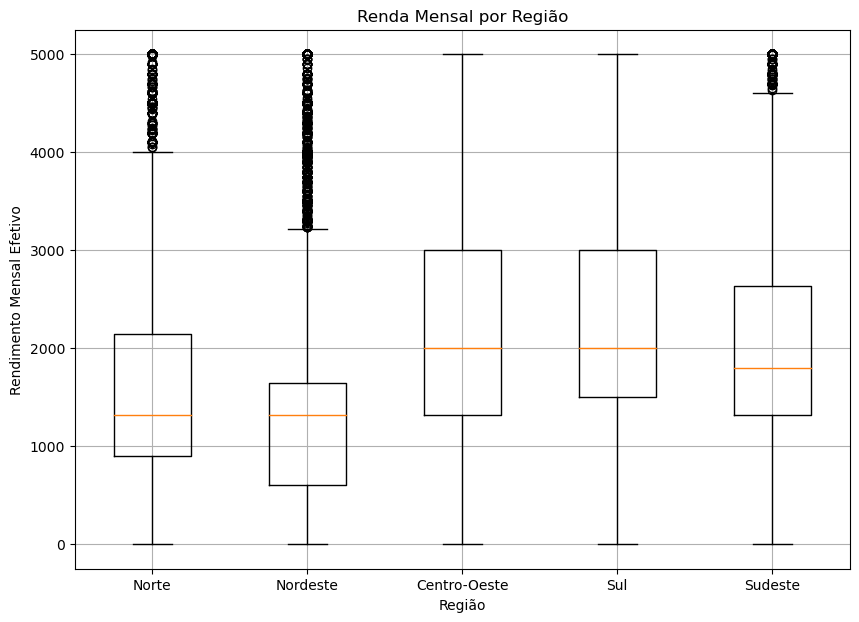

count       178336.0
mean     1843.093486
std      1191.900147
min              0.0
25%           1200.0
50%           1500.0
75%           2500.0
max           5000.0
Name: Rendimento Mensal Efetivo, dtype: Float64

In [50]:
# RELAÇÕES BRASIL

Brasil = pd.crosstab(dados_colunas['Regiao'],dados_colunas['Nível de Instruçao'])
display(Brasil)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([dados_colunas_Norte['Rendimento Mensal Efetivo'],dados_colunas_Nordeste['Rendimento Mensal Efetivo'],
dados_colunas_Centro_Oeste['Rendimento Mensal Efetivo'],dados_colunas_Sul['Rendimento Mensal Efetivo'],
dados_colunas_Sudeste['Rendimento Mensal Efetivo']],labels=['Norte', 'Nordeste', 'Centro-Oeste', 'Sul', 'Sudeste'],)

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Região')
plt.title('Renda Mensal por Região')
plt.show()

dados_colunas['Rendimento Mensal Efetivo'].describe()

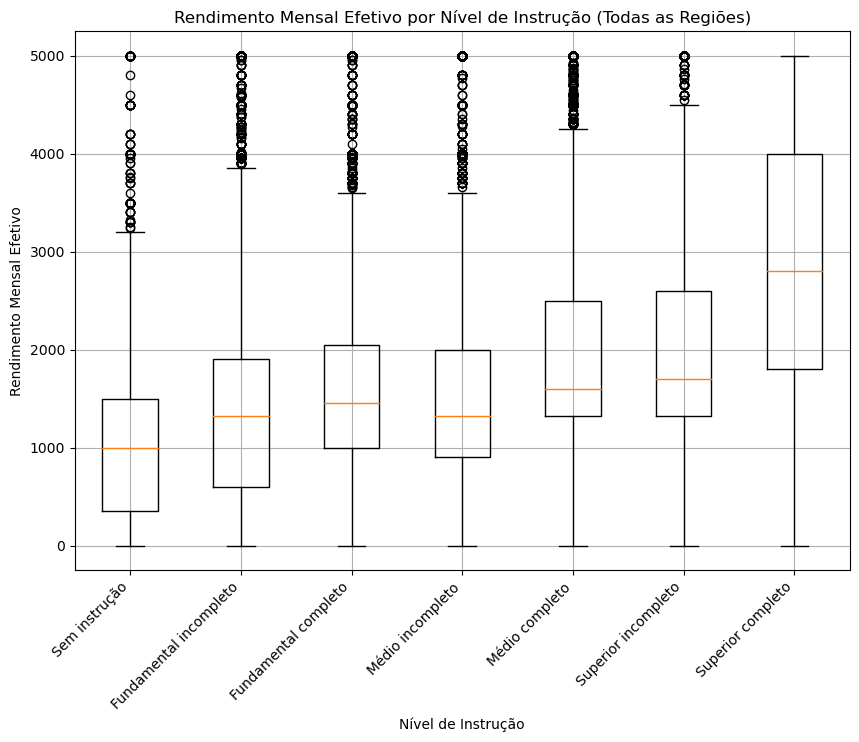

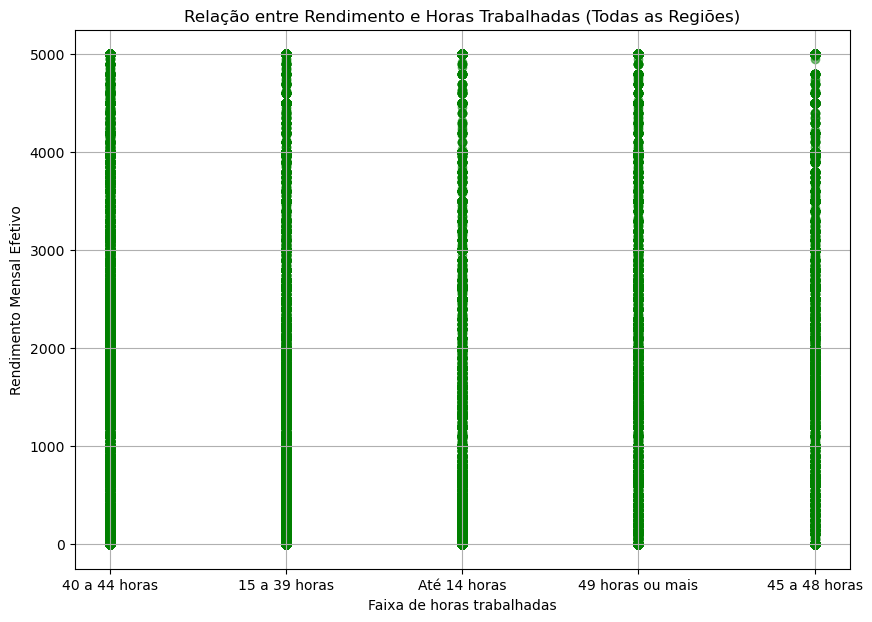

In [51]:
plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
],labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução (Todas as Regiões)')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------

rendimento_geral = dados_colunas['Rendimento Mensal Efetivo']
horas_trabalhadas_geral = dados_colunas['Faixa de horas trabalhadas']

plt.figure(figsize=(10, 7))
plt.scatter(horas_trabalhadas_geral, rendimento_geral, color='green', alpha=0.5)
plt.title('Relação entre Rendimento e Horas Trabalhadas (Todas as Regiões)')
plt.xlabel('Faixa de horas trabalhadas')
plt.ylabel('Rendimento Mensal Efetivo')
plt.grid()
plt.show()

### REGIÃO NORTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,74,280,357,224,37,23
Fundamental incompleto ou equivalente,394,1465,1883,1388,308,119
Fundamental completo ou equivalente,83,286,541,463,117,49
Médio incompleto ou equivalente,61,330,613,508,78,39
Médio completo ou equivalente,232,1036,3039,3181,857,399
Superior incompleto ou equivalente,29,107,445,459,156,84
Superior completo,29,95,514,1231,925,841


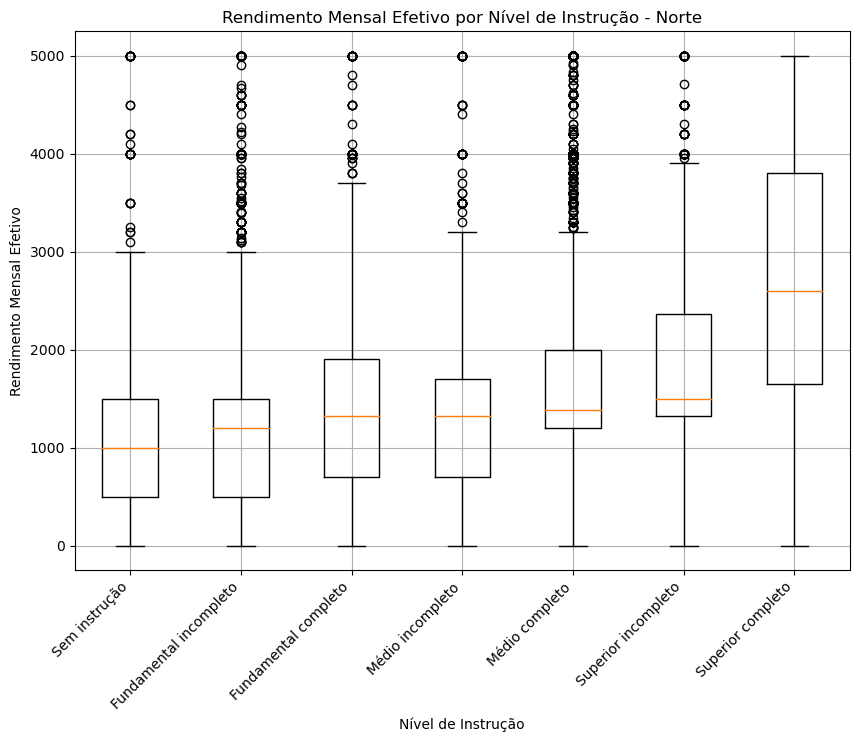

In [52]:
# RELAÇÕES - REGIÃO NORTE

Norte = pd.crosstab(dados_colunas_Norte['Nível de Instruçao'],dados_colunas_Norte['Faixa de Rendimento [em SM]'])
display(Norte)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Norte')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO NORDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,201,1500,887,294,35,17
Fundamental incompleto ou equivalente,646,5604,5044,1944,292,127
Fundamental completo ou equivalente,149,1150,1332,698,137,58
Médio incompleto ou equivalente,107,1068,1332,705,114,46
Médio completo ou equivalente,399,3525,7506,5199,1051,529
Superior incompleto ou equivalente,43,288,987,735,219,117
Superior completo,106,307,1519,2335,1454,1352


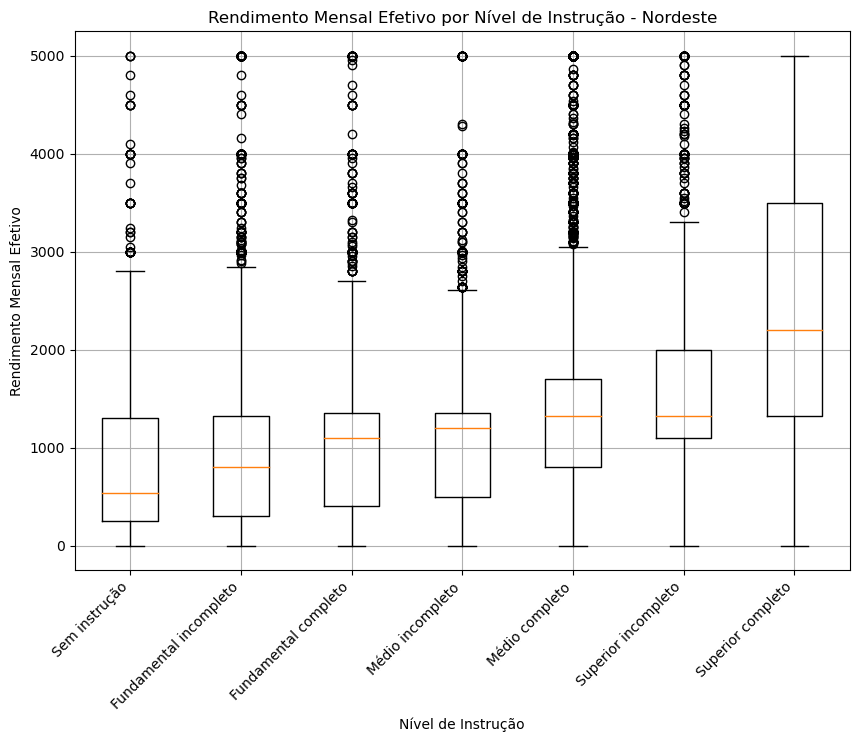

In [53]:
# RELAÇÕES - REGIÃO Nordeste

Nordeste = pd.crosstab(dados_colunas_Nordeste['Nível de Instruçao'],dados_colunas_Nordeste['Faixa de Rendimento [em SM]'])
display(Nordeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Nordeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO CENTRO-OESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,15,80,153,160,51,14
Fundamental incompleto ou equivalente,125,525,1131,1778,572,251
Fundamental completo ou equivalente,29,135,343,597,204,92
Médio incompleto ou equivalente,28,121,388,701,222,92
Médio completo ou equivalente,118,352,1510,3177,1055,630
Superior incompleto ou equivalente,24,63,350,565,211,128
Superior completo,50,50,337,1143,951,998


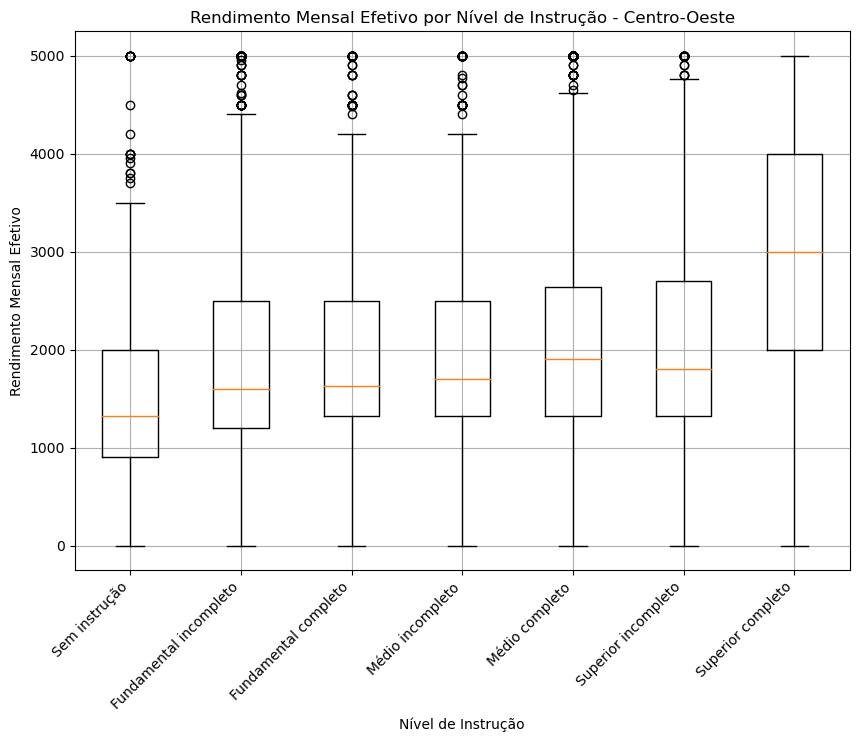

In [54]:
# RELAÇÕES - REGIÃO Centro-Oeste

Centro_Oeste = pd.crosstab(dados_colunas_Centro_Oeste['Nível de Instruçao'],dados_colunas_Centro_Oeste['Faixa de Rendimento [em SM]'])
display(Centro_Oeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Centro-Oeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,23,143,266,307,65,17
Fundamental incompleto ou equivalente,365,1512,3435,4201,877,388
Fundamental completo ou equivalente,96,324,1162,1714,432,190
Médio incompleto ou equivalente,68,330,965,1407,282,158
Médio completo ou equivalente,307,1118,4590,9533,2897,1437
Superior incompleto ou equivalente,47,149,626,1301,477,337
Superior completo,98,171,716,3109,2409,2494


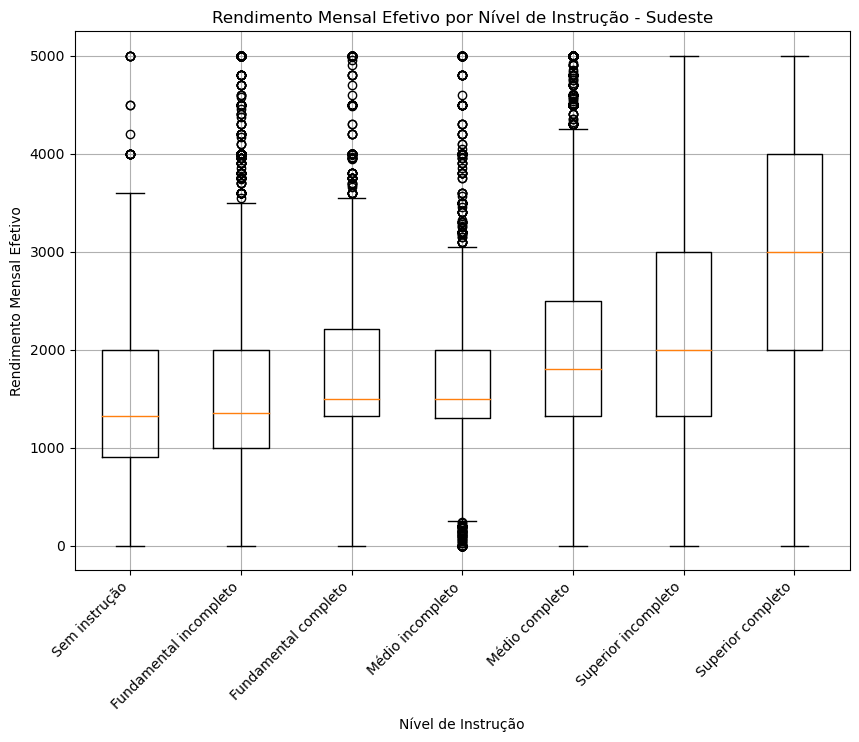

In [55]:
# RELAÇÕES - REGIÃO Sudeste

Sudeste = pd.crosstab(dados_colunas_Sudeste['Nível de Instruçao'],dados_colunas_Sudeste['Faixa de Rendimento [em SM]'])
display(Sudeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sudeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUL

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5
Nível de Instruçao,,,,,,
Sem instrução e menos de 1 ano de estudo,14,54,92,289,56,17
Fundamental incompleto ou equivalente,373,724,1596,3325,963,438
Fundamental completo ou equivalente,106,223,561,1694,584,247
Médio incompleto ou equivalente,51,135,410,1152,337,161
Médio completo ou equivalente,223,368,1442,6345,2306,1244
Superior incompleto ou equivalente,41,79,322,1010,439,267
Superior completo,100,52,341,1902,1546,1770


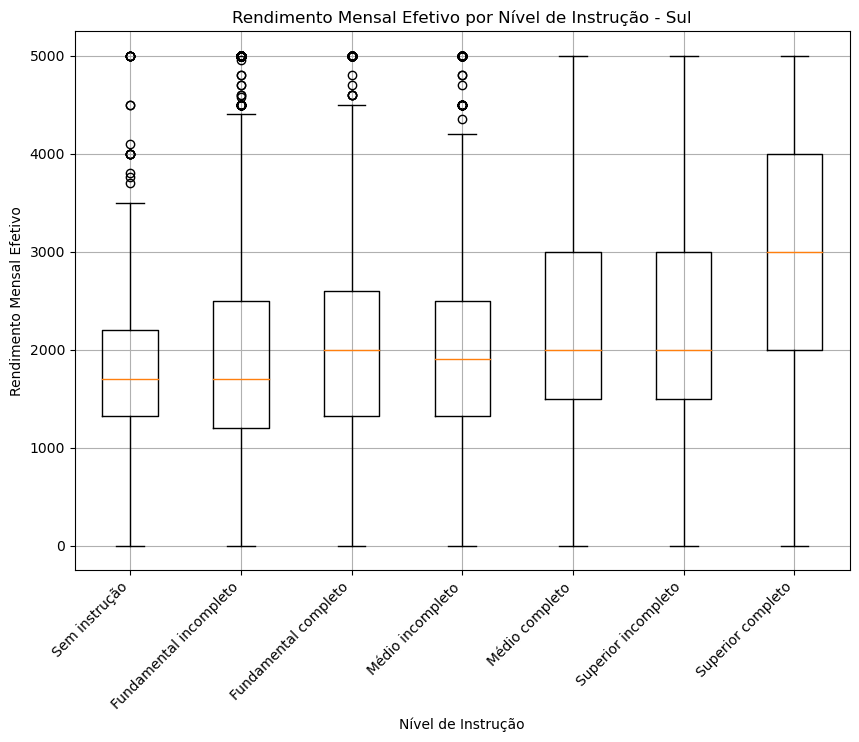

In [56]:
# RELAÇÕES - REGIÃO Sul

Sul = pd.crosstab(dados_colunas_Sul['Nível de Instruçao'],dados_colunas_Sul['Faixa de Rendimento [em SM]'])
display(Sul)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sul')
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
#regressao

a=pd.get_dummies(dados_colunas,dtype=int, drop_first=True)
dados_colunas4=pd.concat([a],axis=1)
print(a)
dados_colunas4['Situacao do Domicílio_Rural']
import numpy as np
dados_colunas4['Rendimento Mensal Efetivo']=dados_colunas4['Rendimento Mensal Efetivo'].astype('int32')
dados_colunas4['Idade']=dados_colunas4["Idade"].astype('int32')
dados_colunas4['Situacao do Domicílio_Rural']=dados_colunas4['Situacao do Domicílio_Rural'].astype('int32')

        Idade  Rendimento Mensal Efetivo  Estado_Acre  Estado_Amazonas  \
0          31                       5000            0                0   
2          50                       3500            0                0   
7          55                       3500            0                0   
9          36                       3000            0                0   
11         33                       3000            0                0   
...       ...                        ...          ...              ...   
473189     34                       2200            0                0   
473197     46                       2600            0                0   
473202     24                       5000            0                0   
473203     51                       5000            0                0   
473204     56                       3500            0                0   

        Estado_Roraima  Estado_Pará  Estado_Amapá  Estado_Tocantins  \
0                    0            0     

In [58]:
tamanho=len(dados_colunas)
tamanho_treino=len(dados_colunas)*0.8
dados_colunas2=dados_colunas.sample(int(tamanho))
dados_colunas_treino=dados_colunas4.iloc[:int(tamanho_treino)]
dados_colunas_teste=dados_colunas4.iloc[int(tamanho_treino):tamanho]
dados_colunas_teste

,Idade,Rendimento Mensal Efetivo,Estado_Acre,Estado_Amazonas,Estado_Roraima,Estado_Pará,Estado_Amapá,Estado_Tocantins,Estado_Maranhão,Estado_Piauí,...,Faixa de Rendimento [em SM]_2 a 3,Faixa de Rendimento [em SM]_3 a 5,Faixa de Rendimento [em SM]_5 a 10,Faixa de Rendimento [em SM]_10 a 20,Faixa de Rendimento [em SM]_20 ou mais,Situacao do Domicílio_Rural,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
388180,43,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388181,23,1800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388183,49,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388184,47,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388185,33,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473189,34,2200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473197,46,2600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473202,24,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
473203,51,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
dados_colunas_treino

,Idade,Rendimento Mensal Efetivo,Estado_Acre,Estado_Amazonas,Estado_Roraima,Estado_Pará,Estado_Amapá,Estado_Tocantins,Estado_Maranhão,Estado_Piauí,...,Faixa de Rendimento [em SM]_2 a 3,Faixa de Rendimento [em SM]_3 a 5,Faixa de Rendimento [em SM]_5 a 10,Faixa de Rendimento [em SM]_10 a 20,Faixa de Rendimento [em SM]_20 ou mais,Situacao do Domicílio_Rural,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
0,31,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,50,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,55,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,36,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11,33,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388165,25,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388166,22,2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
388168,34,2800,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
388169,27,2300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# #regressao

# a=pd.get_dummies(dados_colunas,dtype=int, drop_first=True)
# dados_colunas4=pd.concat([a],axis=1)
# print(a)
# dados_colunas4['Situacao do Domicílio_Rural']
# import numpy as np
# dados_colunas4['Rendimento Mensal Efetivo']=dados_colunas4['Rendimento Mensal Efetivo'].astype('int32')
# dados_colunas4['Idade']=dados_colunas4["Idade"].astype('int32')
# dados_colunas4['Situacao do Domicílio_Rural']=dados_colunas4['Situacao do Domicílio_Rural'].astype('int32')

In [61]:

lista=dados_colunas4.columns
i=27
print(lista[28])


Sexo_Mulher


In [62]:
X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade','Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']

def regress(Y, X):
    X_cp = sm.add_constant(X)  # Adiciona o intercepto
    model = sm.OLS(Y, X_cp)    # Define o modelo de regressão
    results = model.fit()      # Ajusta o modelo aos dados
    return results

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3148.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:26   Log-Likelihood:            -1.1785e+06
No. Observations:                     142668   AIC:                         2.357e+06
Df Residuals:                         142641   BIC:                         2.357e+06
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      708.6025     23.419     30.258      0.000     662.702     754.503
Regiao_Nordeste                                           -193.4765      7.062    -27.398      0.000    -207.317    -179.636
Regiao_Norte                                                53.5498      8.016      6.680      0.000      37.839      69.261
Regiao_Sudeste                                             314.5036      7.150     43.987      0.000     300.490     328.517
Regiao_Sul                                                 534.0256      8.404     63.548      0.000     517.555     550.496
Idade                                                       10.9670      0.211     51.941      0.000      10.553      11.381
Frequentou a Escola_Não                                     89.8578     27.567      3.260      0.001      35.827     143.888
Nível de Instruçao_Fundamental incompleto ou equivalente    59.4646     24.300      2.447      0.014      11.837     107.092
Nível de Instruçao_Fundamental completo ou equivalente     247.6753     25.939      9.548      0.000     196.836     298.515
Nível de Instruçao_Médio incompleto ou equivalente         269.6854     26.337     10.240      0.000     218.066     321.305
Nível de Instruçao_Médio completo ou equivalente           471.0594     24.833     18.969      0.000     422.387     519.732
Nível de Instruçao_Superior incompleto ou equivalente      633.8683     27.035     23.446      0.000     580.880     686.857
Nível de Instruçao_Superior completo                      1303.7774     25.488     51.153      0.000    1253.822    1353.733
Tipo de Ocupacao_Militar ou segurança pública             1423.6911     40.398     35.242      0.000    1344.512    1502.870
Tipo de Ocupacao_Empregado setor privado                   357.5773     10.565     33.845      0.000     336.870     378.285
Tipo de Ocupacao_Empregado setor público                   757.2539     12.453     60.808      0.000     732.846     781.662
Tipo de Ocupacao_Conta própria                            1089.2849     17.658     61.687      0.000    1054.675    1123.895
Tipo de Ocupacao_Empregador                                110.4235     10.715     10.306      0.000      89.423     131.424
Tipo de Ocupacao_Trabalhador familiar não remunerado     -1.705e-13   2.72e-14     -6.275      0.000   -2.24e-13   -1.17e-13
Faixa de horas trabalhadas_15 a 39 horas                  -271.0525      7.060    -38.393      0.000    -284.890    -257.215
Faixa de horas trabalhadas_40 a 44 horas                   106.9118      6.180     17.299      0.000      94.798     119.025
Sexo_M

In [63]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
        'Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.346
Model:                                   OLS   Adj. R-squared:                  0.346
Method:                        Least Squares   F-statistic:                     3625.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:26   Log-Likelihood:            -1.4784e+06
No. Observations:                     178336   AIC:                         2.957e+06
Df Residuals:                         178309   BIC:                         2.957e+06
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1224.5795     16.588     73.822      0.000    1192.067    1257.092
Regiao_Nordeste                                         -637.0701      8.215    -77.554      0.000    -653.170    -620.970
Regiao_Norte                                            -389.7560      9.451    -41.241      0.000    -408.279    -371.233
Regiao_Sudeste                                          -125.1201      8.157    -15.339      0.000    -141.108    -109.133
Regiao_Sul                                                67.9110      8.936      7.600      0.000      50.397      85.425
Idade                                                     10.4353      0.194     53.792      0.000      10.055      10.816
Frequentou a Escola_Não                                   45.4991     18.170      2.504      0.012       9.887      81.111
Nível de Instruçao_Fundamental completo ou equivalente   187.0741      9.602     19.483      0.000     168.254     205.894
Nível de Instruçao_Médio incompleto ou equivalente       212.9478     10.390     20.496      0.000     192.585     233.311
Nível de Instruçao_Médio completo ou equivalente         407.8279      6.693     60.938      0.000     394.711     420.945
Nível de Instruçao_Superior incompleto ou equivalente    549.3373     11.534     47.626      0.000     526.730     571.945
Nível de Instruçao_Superior completo                    1228.1822      8.462    145.133      0.000    1211.596    1244.768
Tipo de Ocupacao_Militar ou segurança pública           1257.2782     36.889     34.082      0.000    1184.976    1329.580
Tipo de Ocupacao_Empregado setor privado                 381.2276      9.698     39.311      0.000     362.220     400.235
Tipo de Ocupacao_Empregado setor público                 768.2864     11.560     66.463      0.000     745.630     790.943
Tipo de Ocupacao_Conta própria                          1098.9165     16.037     68.524      0.000    1067.485    1130.348
Tipo de Ocupacao_Empregador                              133.8804      9.865     13.572      0.000     114.546     153.215
Tipo de Ocupacao_Trabalhador familiar não remunerado   -1.331e-13   1.89e-13     -0.705      0.481   -5.03e-13    2.37e-13
Faixa de horas trabalhadas_15 a 39 horas                -282.6908      6.546    -43.188      0.000    -295.520    -269.862
Faixa de horas trabalhadas_40 a 44 horas                 106.5470      5.655     18.841      0.000      95.463     117.631
Sexo_Mulher                                             -352.7120      5.081    -69.413      0.000    -362.671    -342.753
Cor_Raça_Preta                                        

In [64]:
X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3409.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:27   Log-Likelihood:            -1.1785e+06
No. Observations:                     142668   AIC:                         2.357e+06
Df Residuals:                         142643   BIC:                         2.357e+06
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    756.5068     13.274     56.990      0.000     730.489     782.524
Regiao_Nordeste                                         -182.0095      5.264    -34.576      0.000    -192.327    -171.692
Regiao_Norte                                              65.7798      6.403     10.273      0.000      53.230      78.330
Regiao_Sudeste                                           326.5951      5.195     62.862      0.000     316.412     336.778
Regiao_Sul                                               546.1413      6.860     79.612      0.000     532.696     559.587
Idade                                                     10.9591      0.211     51.937      0.000      10.545      11.373
Nível de Instruçao_Fundamental completo ou equivalente   188.3560     10.487     17.962      0.000     167.803     208.909
Nível de Instruçao_Médio incompleto ou equivalente       210.3162     11.342     18.543      0.000     188.086     232.546
Nível de Instruçao_Médio completo ou equivalente         411.6531      7.211     57.085      0.000     397.519     425.787
Nível de Instruçao_Superior incompleto ou equivalente    574.3705     12.804     44.858      0.000     549.275     599.466
Nível de Instruçao_Superior completo                    1244.3121      9.219    134.971      0.000    1226.243    1262.381
Tipo de Ocupacao_Militar ou segurança pública           1423.5605     40.399     35.238      0.000    1344.380    1502.741
Tipo de Ocupacao_Empregado setor privado                 357.4243     10.565     33.831      0.000     336.717     378.132
Tipo de Ocupacao_Empregado setor público                 757.2752     12.454     60.808      0.000     732.866     781.684
Tipo de Ocupacao_Conta própria                          1089.0274     17.659     61.671      0.000    1054.417    1123.638
Tipo de Ocupacao_Empregador                              110.2925     10.714     10.294      0.000      89.293     131.292
Tipo de Ocupacao_Trabalhador familiar não remunerado   -1.891e-12    5.7e-14    -33.199      0.000      -2e-12   -1.78e-12
Faixa de horas trabalhadas_15 a 39 horas                -271.0865      7.060    -38.397      0.000    -284.924    -257.249
Faixa de horas trabalhadas_40 a 44 horas                 107.1002      6.180     17.330      0.000      94.988     119.213
Sexo_Mulher                                             -332.1357      5.531    -60.048      0.000    -342.977    -321.295
Cor_Raça_Preta                                          -127.6302      8.489    -15.034      0.000    -144.269    -110.992
Cor_Raça_Amarela                                      

In [65]:
X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3558.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:27   Log-Likelihood:            -1.1785e+06
No. Observations:                     142668   AIC:                         2.357e+06
Df Residuals:                         142644   BIC:                         2.357e+06
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    756.2864     13.268     57.000      0.000     730.281     782.292
Regiao_Nordeste                                         -182.0948      5.262    -34.608      0.000    -192.407    -171.782
Regiao_Norte                                              65.6768      6.400     10.262      0.000      53.133      78.221
Regiao_Sudeste                                           326.5237      5.194     62.869      0.000     316.344     336.703
Regiao_Sul                                               546.1807      6.860     79.622      0.000     532.736     559.625
Idade                                                     10.9591      0.211     51.937      0.000      10.546      11.373
Nível de Instruçao_Fundamental completo ou equivalente   188.3820     10.486     17.964      0.000     167.829     208.935
Nível de Instruçao_Médio incompleto ou equivalente       210.2886     11.342     18.541      0.000     188.059     232.519
Nível de Instruçao_Médio completo ou equivalente         411.6354      7.211     57.083      0.000     397.502     425.769
Nível de Instruçao_Superior incompleto ou equivalente    574.3454     12.804     44.857      0.000     549.250     599.441
Nível de Instruçao_Superior completo                    1244.2794      9.219    134.970      0.000    1226.211    1262.348
Tipo de Ocupacao_Militar ou segurança pública           1423.6551     40.398     35.241      0.000    1344.475    1502.835
Tipo de Ocupacao_Empregado setor privado                 357.4169     10.565     33.830      0.000     336.710     378.124
Tipo de Ocupacao_Empregado setor público                 757.3022     12.453     60.811      0.000     732.894     781.711
Tipo de Ocupacao_Conta própria                          1089.0078     17.659     61.670      0.000    1054.398    1123.618
Tipo de Ocupacao_Empregador                              110.2849     10.714     10.293      0.000      89.285     131.285
Tipo de Ocupacao_Trabalhador familiar não remunerado    1.731e-13   1.21e-14     14.337      0.000    1.49e-13    1.97e-13
Faixa de horas trabalhadas_15 a 39 horas                -271.0901      7.060    -38.397      0.000    -284.928    -257.252
Faixa de horas trabalhadas_40 a 44 horas                 107.1161      6.180     17.333      0.000      95.004     119.228
Sexo_Mulher                                             -332.1427      5.531    -60.049      0.000    -342.984    -321.302
Cor_Raça_Preta                                          -127.3267      8.471    -15.032      0.000    -143.929    -110.724
Cor_Raça_Parda                                        

In [66]:
X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3719.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:27   Log-Likelihood:            -1.1785e+06
No. Observations:                     142668   AIC:                         2.357e+06
Df Residuals:                         142645   BIC:                         2.357e+06
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    756.3839     13.268     57.008      0.000     730.379     782.389
Regiao_Nordeste                                         -181.9997      5.261    -34.592      0.000    -192.312    -171.688
Regiao_Norte                                              65.6947      6.400     10.264      0.000      53.150      78.239
Regiao_Sudeste                                           326.5389      5.194     62.872      0.000     316.359     336.719
Regiao_Sul                                               546.1500      6.860     79.618      0.000     532.705     559.595
Idade                                                     10.9593      0.211     51.938      0.000      10.546      11.373
Nível de Instruçao_Fundamental completo ou equivalente   188.3617     10.486     17.962      0.000     167.809     208.915
Nível de Instruçao_Médio incompleto ou equivalente       210.2426     11.342     18.537      0.000     188.013     232.472
Nível de Instruçao_Médio completo ou equivalente         411.6224      7.211     57.081      0.000     397.489     425.756
Nível de Instruçao_Superior incompleto ou equivalente    574.2773     12.804     44.852      0.000     549.182     599.373
Nível de Instruçao_Superior completo                    1244.2818      9.219    134.970      0.000    1226.213    1262.351
Tipo de Ocupacao_Militar ou segurança pública           1423.6171     40.398     35.239      0.000    1344.437    1502.797
Tipo de Ocupacao_Empregado setor privado                 357.4099     10.565     33.829      0.000     336.702     378.117
Tipo de Ocupacao_Empregado setor público                 757.3200     12.453     60.812      0.000     732.911     781.728
Tipo de Ocupacao_Conta própria                          1089.0996     17.658     61.676      0.000    1054.489    1123.710
Tipo de Ocupacao_Empregador                              110.2748     10.714     10.292      0.000      89.275     131.275
Tipo de Ocupacao_Trabalhador familiar não remunerado   -4.291e-13   1.47e-14    -29.225      0.000   -4.58e-13      -4e-13
Faixa de horas trabalhadas_15 a 39 horas                -271.0554      7.060    -38.392      0.000    -284.893    -257.218
Faixa de horas trabalhadas_40 a 44 horas                 107.1292      6.180     17.335      0.000      95.017     119.242
Sexo_Mulher                                             -332.1566      5.531    -60.052      0.000    -342.998    -321.316
Cor_Raça_Preta                                          -127.4639      8.470    -15.049      0.000    -144.065    -110.863
Cor_Raça_Parda                                        

In [67]:
X = dados_colunas_treino[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas_treino['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.365
Model:                                   OLS   Adj. R-squared:                  0.364
Method:                        Least Squares   F-statistic:                     3719.
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:28   Log-Likelihood:            -1.1785e+06
No. Observations:                     142668   AIC:                         2.357e+06
Df Residuals:                         142645   BIC:                         2.357e+06
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    822.0786     17.672     46.517      0.000     787.441     856.716
Regiao_Nordeste                                         -247.6944      7.436    -33.312      0.000    -262.268    -233.121
Regiao_Sudeste                                           260.8442      7.654     34.080      0.000     245.843     275.846
Regiao_Sul                                               480.4553      9.866     48.698      0.000     461.118     499.793
Idade                                                     10.9593      0.211     51.938      0.000      10.546      11.373
Nível de Instruçao_Fundamental completo ou equivalente   188.3617     10.486     17.962      0.000     167.809     208.915
Nível de Instruçao_Médio incompleto ou equivalente       210.2426     11.342     18.537      0.000     188.013     232.472
Nível de Instruçao_Médio completo ou equivalente         411.6224      7.211     57.081      0.000     397.489     425.756
Nível de Instruçao_Superior incompleto ou equivalente    574.2773     12.804     44.852      0.000     549.182     599.373
Nível de Instruçao_Superior completo                    1244.2818      9.219    134.970      0.000    1226.213    1262.351
Tipo de Ocupacao_Militar ou segurança pública           1423.6171     40.398     35.239      0.000    1344.437    1502.797
Tipo de Ocupacao_Empregado setor privado                 357.4099     10.565     33.829      0.000     336.702     378.117
Tipo de Ocupacao_Empregado setor público                 757.3200     12.453     60.812      0.000     732.911     781.728
Tipo de Ocupacao_Conta própria                          1089.0996     17.658     61.676      0.000    1054.489    1123.710
Tipo de Ocupacao_Empregador                              110.2748     10.714     10.292      0.000      89.275     131.275
Tipo de Ocupacao_Trabalhador familiar não remunerado   -1.535e-13    8.5e-15    -18.053      0.000    -1.7e-13   -1.37e-13
Faixa de horas trabalhadas_15 a 39 horas                -271.0554      7.060    -38.392      0.000    -284.893    -257.218
Faixa de horas trabalhadas_40 a 44 horas                 107.1292      6.180     17.335      0.000      95.017     119.242
Sexo_Mulher                                             -332.1566      5.531    -60.052      0.000    -342.998    -321.316
Cor_Raça_Preta                                          -127.4639      8.470    -15.049      0.000    -144.065    -110.863
Cor_Raça_Parda                                          -123.4666      5.782    -21.352      0.000    -134.800    -112.133
Cor_Raça_Indígena                                     

Port conta do prob(onnibus) ser zero demonstra que o modelo não segue uma distribuicao normal, contudo ainda pode haver trechos em que se funcionaria, para isso sera usado probplot

Probplot do treino

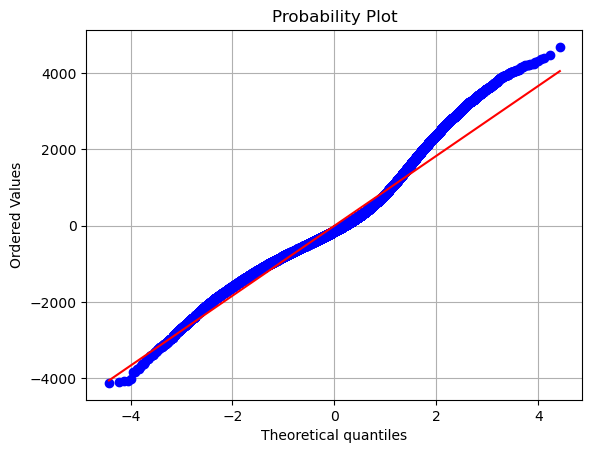

In [68]:
stats.probplot(results.resid,dist="norm",plot=plt)
plt.grid()

Uso de regressão com o teste

In [69]:
X1 = dados_colunas_teste[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y1 = dados_colunas_teste['Rendimento Mensal Efetivo']
results1 = regress(Y1, X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.222
Model:                                   OLS   Adj. R-squared:                  0.222
Method:                        Least Squares   F-statistic:                     509.9
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:29   Log-Likelihood:            -2.9922e+05
No. Observations:                      35668   AIC:                         5.985e+05
Df Residuals:                          35647   BIC:                         5.987e+05
Df Model:                                 20                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1305.0698     38.248     34.121      0.000    1230.102    1380.038
Regiao_Nordeste                                         2.262e-13   3.45e-14      6.554      0.000    1.59e-13    2.94e-13
Regiao_Sudeste                                         -1.005e-13    7.7e-14     -1.305      0.192   -2.51e-13    5.05e-14
Regiao_Sul                                                36.9614     12.704      2.910      0.004      12.062      61.861
Idade                                                      8.0777      0.477     16.932      0.000       7.143       9.013
Nível de Instruçao_Fundamental completo ou equivalente   165.7600     22.991      7.210      0.000     120.697     210.823
Nível de Instruçao_Médio incompleto ou equivalente       208.3261     24.968      8.344      0.000     159.389     257.264
Nível de Instruçao_Médio completo ou equivalente         382.5452     16.744     22.847      0.000     349.727     415.363
Nível de Instruçao_Superior incompleto ou equivalente    458.2568     26.306     17.420      0.000     406.696     509.818
Nível de Instruçao_Superior completo                    1155.9887     20.415     56.625      0.000    1115.975    1196.002
Tipo de Ocupacao_Militar ou segurança pública            615.2822     88.070      6.986      0.000     442.661     787.903
Tipo de Ocupacao_Empregado setor privado                 464.9807     23.605     19.698      0.000     418.714     511.247
Tipo de Ocupacao_Empregado setor público                 777.9426     29.699     26.194      0.000     719.731     836.154
Tipo de Ocupacao_Conta própria                          1145.6227     37.597     30.471      0.000    1071.931    1219.314
Tipo de Ocupacao_Empregador                              224.0625     24.316      9.215      0.000     176.403     271.722
Tipo de Ocupacao_Trabalhador familiar não remunerado   -1.115e-13    3.3e-14     -3.379      0.001   -1.76e-13   -4.68e-14
Faixa de horas trabalhadas_15 a 39 horas                -313.8288     16.743    -18.744      0.000    -346.645    -281.012
Faixa de horas trabalhadas_40 a 44 horas                 113.9741     13.636      8.358      0.000      87.247     140.701
Sexo_Mulher                                             -435.1271     12.404    -35.081      0.000    -459.439    -410.816
Cor_Raça_Preta                                          -136.6702     20.886     -6.544      0.000    -177.608     -95.732
Cor_Raça_Parda                                          -108.7647     13.553     -8.025      0.000    -135.330     -82.200
Cor_Raça_Indígena                                     

In [70]:
X1 = dados_colunas_teste[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y1 = dados_colunas_teste['Rendimento Mensal Efetivo']
results1 = regress(Y1, X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.221
Model:                                   OLS   Adj. R-squared:                  0.220
Method:                        Least Squares   F-statistic:                     531.0
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:29   Log-Likelihood:            -2.9926e+05
No. Observations:                      35668   AIC:                         5.986e+05
Df Residuals:                          35648   BIC:                         5.987e+05
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1486.9427     32.801     45.332      0.000    1422.652    1551.234
Regiao_Nordeste                                         2.603e-11   5.72e-13     45.498      0.000    2.49e-11    2.72e-11
Regiao_Sudeste                                         -5.128e-13   1.77e-14    -28.977      0.000   -5.47e-13   -4.78e-13
Regiao_Sul                                                41.0701     12.711      3.231      0.001      16.157      65.983
Idade                                                      8.1354      0.478     17.034      0.000       7.199       9.071
Nível de Instruçao_Fundamental completo ou equivalente   168.7672     23.016      7.333      0.000     123.656     213.878
Nível de Instruçao_Médio incompleto ou equivalente       214.5568     24.988      8.586      0.000     165.580     263.534
Nível de Instruçao_Médio completo ou equivalente         396.2894     16.697     23.735      0.000     363.564     429.015
Nível de Instruçao_Superior incompleto ou equivalente    478.6255     26.244     18.238      0.000     427.186     530.065
Nível de Instruçao_Superior completo                    1184.3236     20.206     58.614      0.000    1144.720    1223.927
Tipo de Ocupacao_Militar ou segurança pública            420.5519     85.598      4.913      0.000     252.777     588.327
Tipo de Ocupacao_Empregado setor privado                 285.8661     13.408     21.320      0.000     259.585     312.147
Tipo de Ocupacao_Empregado setor público                 600.5597     22.643     26.523      0.000     556.179     644.940
Tipo de Ocupacao_Conta própria                           959.9006     31.776     30.209      0.000     897.619    1022.182
Tipo de Ocupacao_Trabalhador familiar não remunerado    9.001e-14   3.34e-14      2.696      0.007    2.46e-14    1.55e-13
Faixa de horas trabalhadas_15 a 39 horas                -320.4986     16.747    -19.138      0.000    -353.323    -287.674
Faixa de horas trabalhadas_40 a 44 horas                 110.5877     13.647      8.103      0.000      83.839     137.336
Sexo_Mulher                                             -468.1876     11.887    -39.385      0.000    -491.487    -444.888
Cor_Raça_Preta                                          -147.0025     20.881     -7.040      0.000    -187.929    -106.075
Cor_Raça_Parda                                          -114.0472     13.557     -8.412      0.000    -140.620     -87.475
Cor_Raça_Indígena                                       -191.4330     97.770     -1.958      0.050    -383.065       0.199
Alfabetizado_Não                                      

In [71]:
X1 = dados_colunas_teste[['Regiao_Nordeste','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y1 = dados_colunas_teste['Rendimento Mensal Efetivo']
results1 = regress(Y1, X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.220
Model:                                   OLS   Adj. R-squared:                  0.220
Method:                        Least Squares   F-statistic:                     560.2
Date:                       Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                               13:58:29   Log-Likelihood:            -2.9926e+05
No. Observations:                      35668   AIC:                         5.986e+05
Df Residuals:                          35649   BIC:                         5.987e+05
Df Model:                                 18                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1484.2212     32.773     45.288      0.000    1419.985    1548.457
Regiao_Nordeste                                         6.465e-12    1.2e-13     53.673      0.000    6.23e-12     6.7e-12
Regiao_Sudeste                                          3.697e-13   2.12e-14     17.404      0.000    3.28e-13    4.11e-13
Regiao_Sul                                                42.2745     12.696      3.330      0.001      17.389      67.160
Idade                                                      8.1474      0.478     17.060      0.000       7.211       9.083
Nível de Instruçao_Fundamental completo ou equivalente   168.9435     23.016      7.340      0.000     123.831     214.056
Nível de Instruçao_Médio incompleto ou equivalente       214.3064     24.989      8.576      0.000     165.328     263.285
Nível de Instruçao_Médio completo ou equivalente         396.4085     16.697     23.741      0.000     363.682     429.135
Nível de Instruçao_Superior incompleto ou equivalente    479.2800     26.243     18.263      0.000     427.843     530.717
Nível de Instruçao_Superior completo                    1185.2010     20.201     58.669      0.000    1145.606    1224.796
Tipo de Ocupacao_Militar ou segurança pública            421.1540     85.601      4.920      0.000     253.374     588.934
Tipo de Ocupacao_Empregado setor privado                 285.7072     13.409     21.308      0.000     259.426     311.988
Tipo de Ocupacao_Empregado setor público                 600.4392     22.644     26.517      0.000     556.057     644.822
Tipo de Ocupacao_Conta própria                           960.2495     31.776     30.219      0.000     897.967    1022.532
Tipo de Ocupacao_Trabalhador familiar não remunerado    8.432e-15   4.59e-15      1.835      0.066   -5.73e-16    1.74e-14
Faixa de horas trabalhadas_15 a 39 horas                -320.3540     16.747    -19.129      0.000    -353.179    -287.528
Faixa de horas trabalhadas_40 a 44 horas                 110.5620     13.648      8.101      0.000      83.812     137.312
Sexo_Mulher                                             -468.1991     11.888    -39.385      0.000    -491.500    -444.899
Cor_Raça_Preta                                          -145.2565     20.863     -6.963      0.000    -186.148    -104.365
Cor_Raça_Parda                                          -112.1759     13.524     -8.295      0.000    -138.683     -85.668
Alfabetizado_Não                                        -398.3860     45.941     -8.672      0.000    -488.433    -308.339
Situacao do Domicílio_Rural                           

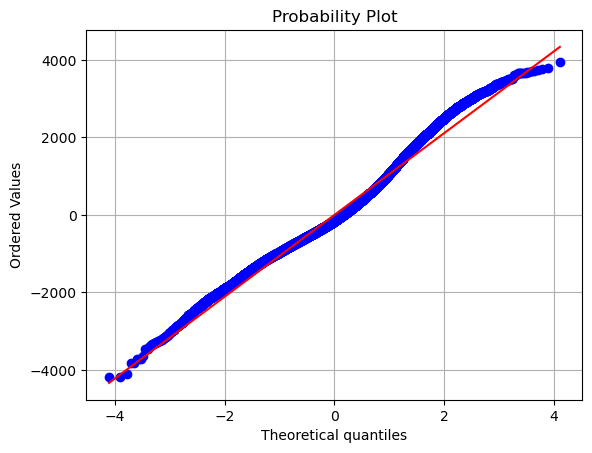

In [72]:
stats.probplot(results1.resid,dist="norm",plot=plt)
plt.grid()

É possivel analisar a Partir do teste que O modelo de regressão funciona como uma normal, dentre os valores de residuo(renda calculada-renda real) de -4 a cerca de +2, dessa forma seguindo a hipotese de dependencia nesta area. 
A partir do Teste, é possível perceber que o modelo aplicado de Regressão funciona como uma normal dentre os valores de resíduos (renda calculada - renda real) para valores menores que 2, seguindo, assim, a hpótese de sependência nesta área.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np
import matplotlib.pyplot as plt



from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

df= pd.read_csv('Position_Salaries.csv')
print(df)

df.info()

#Cirando fetures e target
X = df.iloc[:,1:2].values
print('X: ',X)
y = df.iloc[:,2].values


# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)
print(predictions)
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

X_grid = np.arange(min(X),max(X),.99)
#X_grid = X_grid.reshape(len(predictions),1) 
  
plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, predictions,color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()